# Feature Selection

## Univariate selection

Using univariate selection via sklearn.feature_selection.SelectKBest  library, we can get some insight into the importance of each feature in our model.

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
# Import SelectKBest and chi2(metric that will help us calculate the importance of our feature)from sklearn.feature_selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [2]:
#create new feature set without standartization based on prepared df with one hot encoding
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
#create new independent variable set
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
Y = data['Class']

In [3]:
#Then I create SelectKBest object with parameters score_func = chi2 
#(chi2 is a metric i will use to evaluate the importance of featrue) and k = 10 (I need just the top 3 features)
bestfeatures = SelectKBest(score_func = chi2, k = 10)
# Z is non - normalized feature set and I is a df, not a np array
fit = bestfeatures.fit(X, Y)

In [4]:
#Create a dataframe containing scores (chi2)
dfscores = pd.DataFrame(fit.scores_)
#Column dataframe
dfcolumns = pd.DataFrame(X.columns)

In [5]:
#Concat 2 previous df to get better visualisation
featurescores = pd.concat([dfcolumns, dfscores], axis = 1)
featurescores.columns = ['Feature','Score']
featurescores.set_index('Feature', inplace = True)
featurescores

,Score
Feature,
FlightNumber,215.658242
PayloadMass,12851.122424
Flights,1.642857
Block,11.200000
ReusedCount,34.231544
...,...
GridFins_True,8.257143
Reused_False,1.594340
Reused_True,2.283784


Finally, let's take a look of a top 10 most important feature scores

In [6]:
print(featurescores.nlargest(10,'Score'))


                                            Score
Feature                                          
PayloadMass                          12851.122424
FlightNumber                           215.658242
ReusedCount                             34.231544
Legs_False                              32.236842
GridFins_False                          28.900000
Block                                   11.200000
Legs_True                                8.626761
GridFins_True                            8.257143
LandingPad_5e9e3032383ecb6bb234e7ca      5.714286
LandingPad_5e9e3032383ecb761634e7cb      4.000000


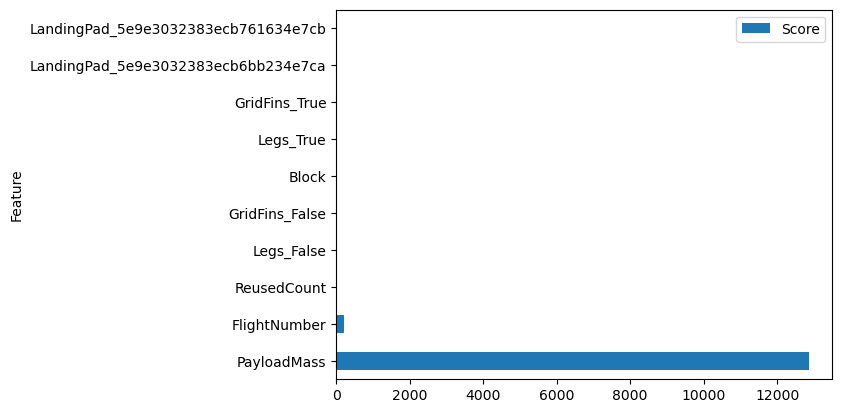

In [7]:
featurescores.nlargest(10,'Score').plot(kind='barh')
plt.show()

# Feature Importance



You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [8]:
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [9]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[4.36248702e-02 3.39222182e-02 1.87433272e-02 5.29868641e-02
 4.66315163e-02 3.30924814e-03 2.69360269e-06 1.29006695e-02
 5.57999639e-04 1.22156703e-02 4.40730977e-03 6.35492279e-04
 6.57864045e-03 1.34623564e-03 3.02665301e-03 4.40447279e-03
 1.19545941e-02 1.18700117e-02 5.49261697e-03 1.57283087e-02
 7.76243678e-04 2.57649933e-02 2.24973372e-02 1.07281727e-02
 8.41056097e-04 1.06017829e-03 4.80421866e-04 7.59867583e-04
 8.89939309e-05 4.64015152e-05 8.91281118e-03 4.84915156e-03
 4.63000214e-05 4.04282766e-04 1.44403165e-04 7.45751487e-03
 4.36888210e-03 5.90451427e-03 1.97363747e-04 1.65141422e-02
 1.69313837e-02 9.56136867e-04 1.88367593e-02 9.38512524e-04
 2.10791900e-03 5.70917629e-04 4.30840263e-04 2.10644727e-03
 2.35496259e-02 5.72243108e-04 2.24719101e-04 3.12759287e-04
 7.21523664e-04 5.51405609e-04 1.75436991e-03 6.86364452e-03
 1.54730903e-03 2.73484848e-04 1.62180058e-02 8.18485480e-04
 1.05879012e-02 5.35049161e-04 4.26383937e-05 2.11290934e-02
 5.00544908e-04 3.321782

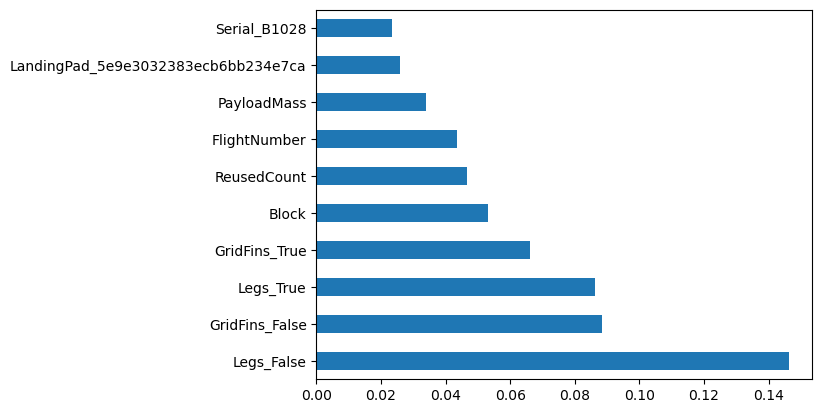

In [10]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

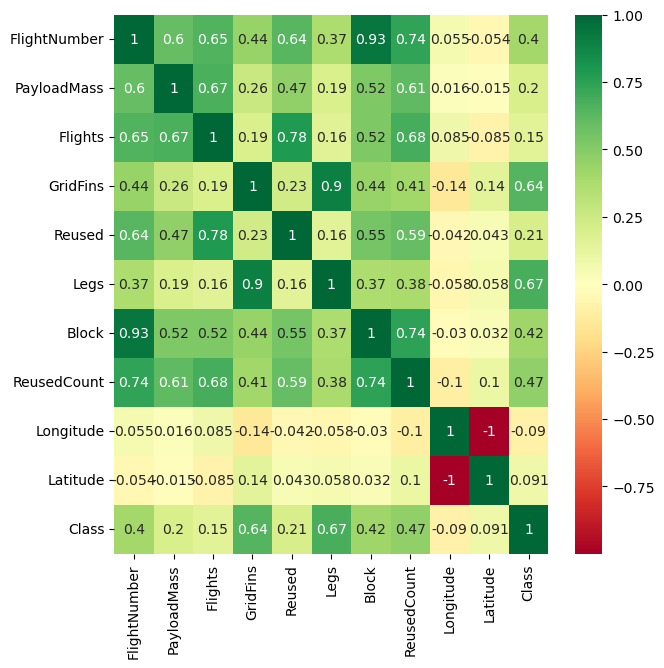

In [15]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(7,7))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

SyntaxError: invalid syntax (3865497199.py, line 91)